## Dependencies

In [1]:
import itertools
import os
import pickle
import sys
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

Configure environment variable

In [2]:
# take environment variables from .env.  
load_dotenv()

# changing current directory to read dataset
os.chdir(os.getenv("DATASET_PATH"))

Setting max columns and rows

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

Reading CSV files

In [4]:
data = pd.read_csv('data.csv')
data_w_genre = pd.read_csv('data_w_genres.csv')
data_genre = pd.read_csv('data_by_genres.csv')

Displaying the first 5 rows of each dataset

In [5]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
# checking the some info on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [7]:
data_w_genre.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [8]:
# checking the some info on the dataframe
data_w_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [9]:
# creating function to come up with common features 
def common_features(list_comparison: list[list]) -> list:
    result = set(list_comparison[0])
    for s in list_comparison[1:]:
        result.intersection_update(s)
    return list(result)

In [10]:
import pprint

# creating a list of features for each dataset
data_features = list(data.columns)
data_w_genre_features = list(data_w_genre.columns)
list_comparison = [data_features,data_w_genre_features]

# comparing features from each dataset
features_common = sorted(common_features(list_comparison))
pprint.pprint(features_common)

['acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo',
 'valence']


In [11]:
# creating list of uncommon features
data_features_only = [ft for ft in data_features if ft not in features_common] 
data_w_genre_features_only = [ft for ft in data_w_genre_features if ft not in features_common]

# printing features
pprint.pprint(sorted(data_features_only))
pprint.pprint(sorted(data_w_genre_features_only))
total_features = data_features_only + data_w_genre_features_only
pprint.pprint(sorted(set(total_features)))

['explicit', 'id', 'name', 'release_date', 'year']
['count', 'genres']
['count', 'explicit', 'genres', 'id', 'name', 'release_date', 'year']


## Feature Description

### **Common Numerical Features**
The following description is from spotify developers page for getting the track's audio features: [link](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

| Feature |Description |
| --- | --- |
| acousticness |  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| duration_ms | The track length in milliseconds. |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| key | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live. |
| loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. |
| mode | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| popularity | The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks. |
| speechiness | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| valence | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |

**Features for the data dataset**

| Feature | Datatype | Description |
| --- | --- | --- |
| artists | object | A list of artists who performed a given track |
| explicit | int | If a song contains curse words, violent, sexual, or offensive language then the song would be explicit, where 0 equals False and 1 equals True.
| id | object | The Spotify ID for the track. |
| name | object | The name of the track. |
| release_date | object | The date the track was first released. |

**Features for the data_w_genre dataset**

| Feature | Datatype | Description |
| --- | --- | --- |
| artists | object | This contains the name of each artist in the dataset |
| genres | object | This contains a list of genres related to the particular artist |

In [12]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [13]:
data_w_genre.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='year', ylabel='popularity'>

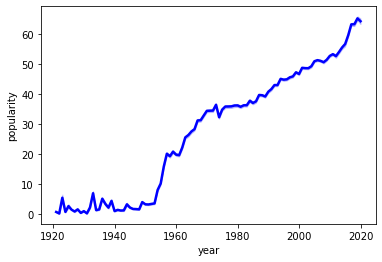

In [14]:
sns.lineplot(x=data['year'], y=data['popularity'], color = 'blue',linewidth=2.5)

<AxesSubplot:xlabel='danceability', ylabel='valence'>

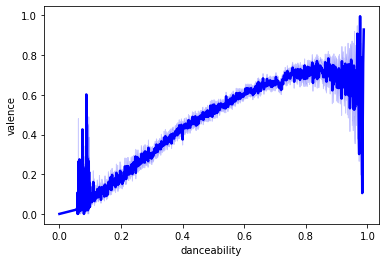

In [15]:
sns.lineplot(x=data['danceability'], y=data['valence'], color = 'blue',linewidth=2.5)

Text(0.5, 1.0, 'Comparing the tempo with the top 10 most popular genres')

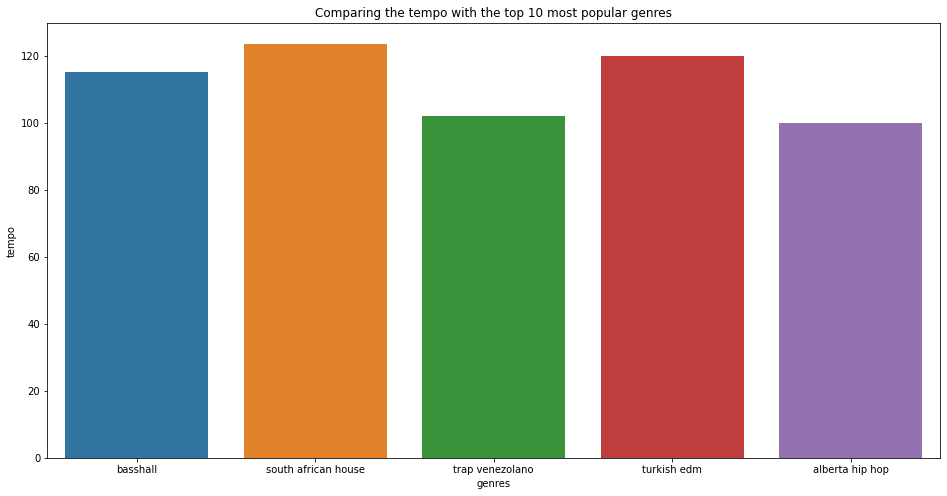

In [16]:
plt.figure(figsize=(16, 8))
genres_5 = data_genre.nlargest(5, 'popularity')
figure = sns.barplot(data=genres_5, x="genres", y="tempo")
figure.set_title('Comparing the tempo with the top 10 most popular genres')

Text(0.5, 1.0, 'Comparing the danceability with the top 10 most popular genres')

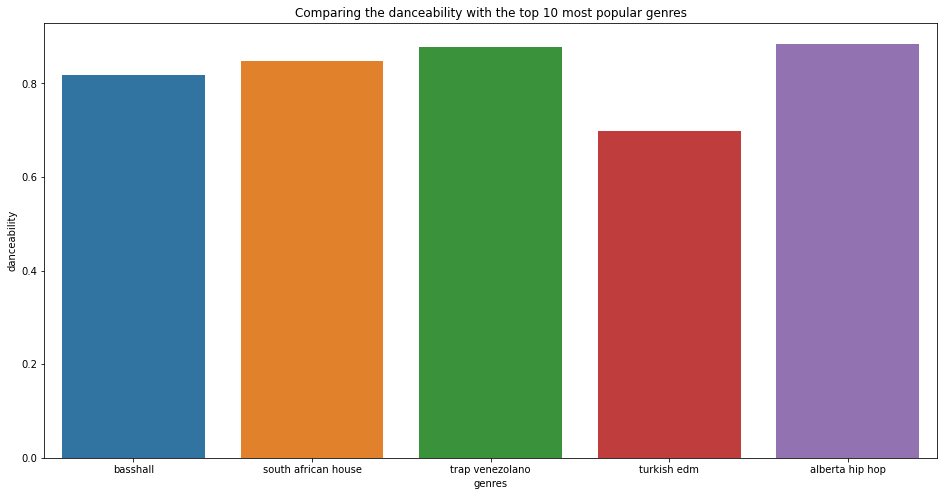

In [17]:
plt.figure(figsize=(16, 8))
genres_5 = data_genre.nlargest(5, 'popularity')
figure = sns.barplot(data=genres_5, x="genres", y="danceability")
figure.set_title('Comparing the danceability with the top 10 most popular genres')

<AxesSubplot:xlabel='genres', ylabel='loudness'>

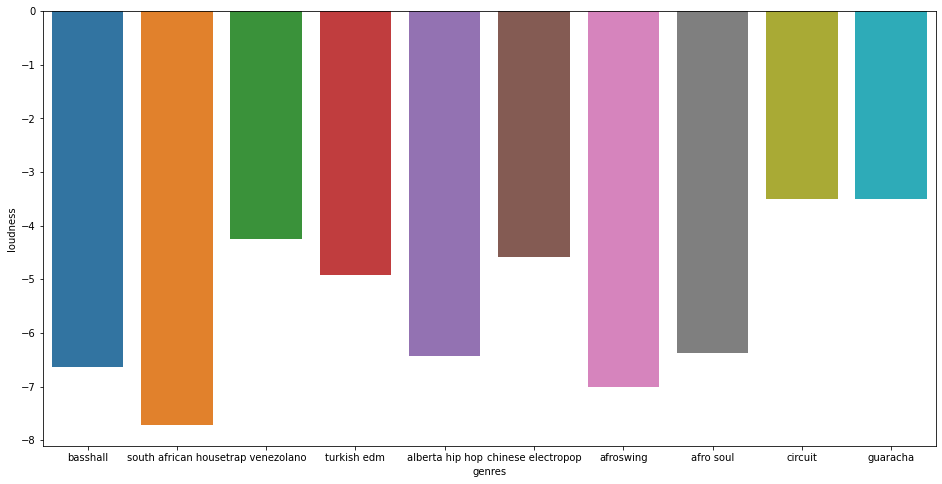

In [18]:
plt.figure(figsize=(16, 8))
genres_5 = data_genre.nlargest(10, 'popularity')
sns.barplot(data=genres_5, x="genres", y="loudness")

<AxesSubplot:>

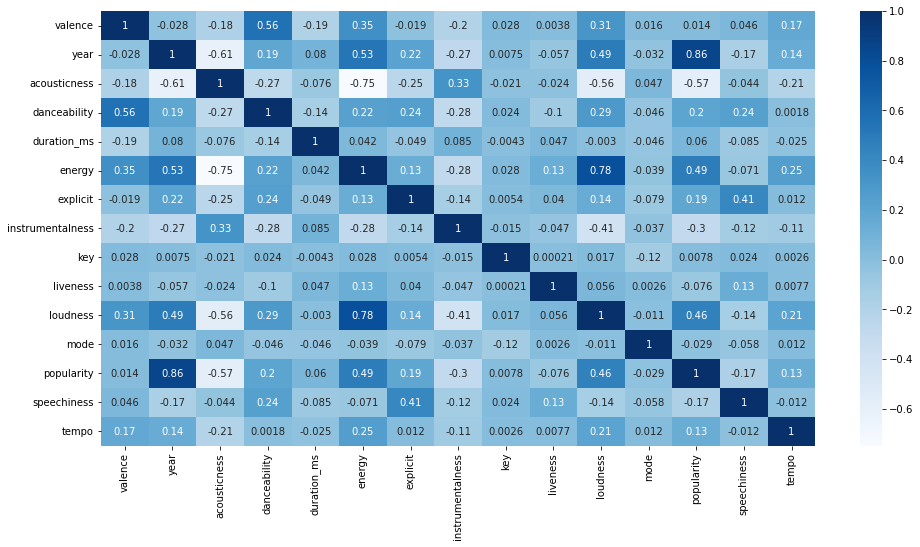

In [19]:
plt.figure(figsize=(16, 8))
sns.heatmap(data=data.corr(),annot=True,cmap='Blues')

# Data Preparation

## Checking for missing values

In [20]:
# checking for null values
data.isnull().values.any()

False

In [21]:
# lets take a look at the object data types
obj_dtypes = list(data.columns[data.dtypes=='object'])
print(obj_dtypes)
# checking if the lists are actually strings for all elements in the artists feature
print(sum([0 for e in data[obj_dtypes[0]] if type(e) == str]))

['artists', 'id', 'name', 'release_date']
0


In [22]:
# checking for null values
data_w_genre.isnull().values.any()

False

### Taking a look at the object data types

In [23]:
# lets take a look at the object data types
obj_dtypes = list(data_w_genre.columns[data_w_genre.dtypes=='object'])

# checking if the lists are actually strings for all elements in the column
print(sum([0 for e in data_w_genre[obj_dtypes[0]] if type(e) == str]))

# checking if the lists are actually strings for all elements in the column
print(sum([0 for e in data_w_genre[obj_dtypes[1]] if type(e) == str]))

0
0


The list in the column features are actually strings therefore we must convert the string lists to actual lists

heres an example of what the string lists look like:

In [24]:
data['artists'].iloc[0]

"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']"

In [25]:
data_w_genre['genres'].iloc[0]

"['show tunes']"

We need to get rid of apostrophes and quotations then split the string of names into a list for both genres names and artist names

Updating Genres names:

In [26]:
data_w_genre['genres_v1'] = data_w_genre['genres'].apply(lambda x: x.strip('][').replace("'", "").replace('"', "").split(', '))

In [27]:
data_w_genre['genres_v1'] = data_w_genre['genres_v1'].apply(lambda x: [i.replace(" ", "_") for i in x])

In [28]:
# before as a string list
data_w_genre['genres'].iloc[9]

"['emo rap', 'florida rap', 'sad rap', 'underground hip hop', 'vapor trap']"

In [29]:
# after as a list
data_w_genre['genres_v1'].iloc[9]

['emo_rap', 'florida_rap', 'sad_rap', 'underground_hip_hop', 'vapor_trap']

Updating Artist names

In [30]:
data['artists_v1'] = data['artists'].apply(lambda x: x.strip('][').replace("'", "").replace('"', "").split(', '))

In [31]:
# before as a string list
data['artists'].iloc[35]

"['Ermanno Wolf-Ferrari', 'Arturo Toscanini']"

In [32]:
# after as a list
data['artists_v1'].iloc[35]

['Ermanno Wolf-Ferrari', 'Arturo Toscanini']

Checking for duplicate records

You can notice that the first two songs are exact duplicates.

In [33]:
data[data['name']=='Safari']

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_v1
19748,0.604,2020,0.53100,"['J Balvin', 'Pharrell Williams', 'BIA', 'Sky']",0.689,205600,0.675,0,2iEQYZMYCS8XWlHBRCBzDE,0.000003,0,0.115,-4.281,1,Safari,1,2020-11-20,0.320,180.077,"[J Balvin, Pharrell Williams, BIA, Sky]"
19753,0.604,2020,0.53100,"['J Balvin', 'Pharrell Williams', 'BIA', 'Sky']",0.689,205600,0.675,0,4j9bUBWorNXVrmT2fppDgv,0.000003,0,0.115,-4.281,1,Safari,1,2020-11-20,0.320,180.077,"[J Balvin, Pharrell Williams, BIA, Sky]"
56596,0.604,2016,0.53100,"['J Balvin', 'Pharrell Williams', 'BIA', 'Sky']",0.689,205600,0.675,0,456xBIOmLRoLzCvCzZrWge,0.000003,0,0.115,-4.281,1,Safari,69,2016-06-24,0.320,180.065,"[J Balvin, Pharrell Williams, BIA, Sky]"
119334,0.657,1992,0.00709,['The Breeders'],0.442,211907,0.709,0,1zktqqlxSFniWdUWGGkjK5,0.409000,1,0.152,-12.476,1,Safari,40,1992-04-06,0.033,114.496,[The Breeders]


I need to create my own song id in order to drop duplicates since some of the songs are being added again at different dates even though all of the features remain the same.

In [34]:
# creating function for id hash value
from hashlib import sha256
def generate_id_hash(list_of_elements:list)->str:
    list_of_strings = [str(i) for i in list_of_elements]
    return sha256(str("".join(list_of_strings)).encode("utf-8")).hexdigest()

In [35]:
# creating my own song_id by hashing all the values except the original id
data['song_id'] = data.apply(lambda row: generate_id_hash(
    [row['artists_v1'][0],
     row['valence'],
     row['acousticness'],
     row['danceability'],
     row['duration_ms'],
     row['energy'],
     row['name'],
     row['explicit'],
     row['instrumentalness'],
     row['key'],
     row['liveness'],
     row['loudness'],
     row['mode'],
     row['loudness'],
     row['popularity'],
     row['speechiness'],
     row['release_date'],
     row['tempo'],
     row['year']
    ]),axis = 1)

Finding the total amount of duplicates

In [36]:
dups = data['song_id'].duplicated().sum()
print(f"There are a total of {dups} duplicate records")

There are a total of 557 duplicate records


In [37]:
data.drop_duplicates('song_id',inplace = True)

In [38]:
data[data['name']=='Safari']

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_v1,song_id
19748,0.604,2020,0.53100,"['J Balvin', 'Pharrell Williams', 'BIA', 'Sky']",0.689,205600,0.675,0,2iEQYZMYCS8XWlHBRCBzDE,0.000003,0,0.115,-4.281,1,Safari,1,2020-11-20,0.320,180.077,"[J Balvin, Pharrell Williams, BIA, Sky]",95b156d2b7abe60b09322ce764310932bc973620bd466e...
56596,0.604,2016,0.53100,"['J Balvin', 'Pharrell Williams', 'BIA', 'Sky']",0.689,205600,0.675,0,456xBIOmLRoLzCvCzZrWge,0.000003,0,0.115,-4.281,1,Safari,69,2016-06-24,0.320,180.065,"[J Balvin, Pharrell Williams, BIA, Sky]",1c69006a939194db282d4d65c6fe69e151db13e9fcd392...
119334,0.657,1992,0.00709,['The Breeders'],0.442,211907,0.709,0,1zktqqlxSFniWdUWGGkjK5,0.409000,1,0.152,-12.476,1,Safari,40,1992-04-06,0.033,114.496,[The Breeders],80f602b2c7502ba1e02c8194ab4d6016e89e48d76527ac...


As you can see there are now 3 records instead of 4 since the duplicated record was deleted.

## Splitting up list artists to individual artists

In [39]:
ind_artists = data[['artists_v1','id']].explode('artists_v1')

In [40]:
ind_artists[ind_artists["id"] == "7jg3Irt0hqnss3HvaPP2D2"]

,artists_v1,id
14893,112,7jg3Irt0hqnss3HvaPP2D2
14893,The Notorious B.I.G.,7jg3Irt0hqnss3HvaPP2D2


In [41]:
artists_merge = ind_artists.merge(data_w_genre, how = 'left', left_on = 'artists_v1',right_on = 'artists')

Check for missing values

In [42]:
artists_merge[artists_merge["genres_v1"].isnull()].shape

(4615, 19)

In [43]:
artists_merge_nonnull = artists_merge[~artists_merge["genres_v1"].isnull()]

In [44]:
artists_genres = artists_merge_nonnull.groupby('id')['genres_v1'].apply(list).reset_index()

In [45]:
artists_genres['genre_list'] = artists_genres['genres_v1'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))

In [46]:
artists_genres.head()

,id,genres_v1,genre_list
0,000G1xMMuwxNHmwVsBdtj1,"[[candy_pop, dance_rock, new_wave, new_wave_po...","[rock, candy_pop, new_wave, dance_rock, perman..."
1,000GyYHG4uWmlXieKLij8u,"[[alternative_hip_hop, conscious_hip_hop, minn...","[pop_rap, minnesota_hip_hop, conscious_hip_hop..."
2,000Npgk5e2SgwGaIsN3ztv,"[[classic_bollywood, classic_pakistani_pop, fi...","[ghazal, sufi, filmi, classic_bollywood, class..."
3,000jBcNljWTnyjB4YO7ojf,[[]],[]
4,000mGrJNc2GAgQdMESdgEc,"[[classical, french_romanticism, late_romantic...","[late_romantic_era, french_romanticism, classi..."


In [47]:
data = data.merge(artists_genres[['id','genre_list']], on = 'id',how = 'left')

Now we can save the data start with Feature Engineering

Split release dates by year

In [48]:
data['year'] = data['release_date'].apply(lambda x: x.split('-')[0])

Since popularity ranges between 0-100, the popularity will be split into 10 groups

In [49]:
# splitting popularity
data['popularity'] = data['popularity'].apply(lambda x: int(x/10))

In [50]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_v1,song_id,genre_list
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0,1921,0.0366,80.954,"[Sergei Rachmaninoff, James Levine, Berliner P...",67c14749c1e991f87206f704adc1a4de5b9f04198c1eee...,"[ukrainian_classical, opera, classical_perform..."
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,0,1921,0.4150,60.936,[Dennis Day],e8c4c5200effc58c238d2d9e84e21e1440454d4273ef20...,[]
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,0,1921,0.0339,110.339,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,b388455a15f89a479b218ea80c9d1777564f53e1936f5a...,[]
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,0,1921,0.0354,100.109,[Frank Parker],696e4d114c85ed855380a72eedd0c78a8abf0908984c88...,[]
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,0,1921,0.0380,101.665,[Phil Regan],57c19e93daa588d008afc84bc1bef902fca25666c124c9...,[]


Drop features that are not needed moving forward

In [51]:
# features list
unwanted_features = [
    "duration_ms",
    "release_date",
    "artists",
    "song_id"
    
]

# getting rid of unwanted features
data.drop(unwanted_features, axis = 1, inplace = True)

In [52]:
data.head()

,valence,year,acousticness,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_v1,genre_list
0,0.0594,1921,0.982,0.279,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0,0.0366,80.954,"[Sergei Rachmaninoff, James Levine, Berliner P...","[ukrainian_classical, opera, classical_perform..."
1,0.9630,1921,0.732,0.819,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,0,0.4150,60.936,[Dennis Day],[]
2,0.0394,1921,0.961,0.328,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,0,0.0339,110.339,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,[]
3,0.1650,1921,0.967,0.275,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,0,0.0354,100.109,[Frank Parker],[]
4,0.2530,1921,0.957,0.418,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,0,0.0380,101.665,[Phil Regan],[]


Saving dataframe

In [53]:
# Open a file and use dump()
with open('data_prepared.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(data, file)

In [54]:
data.head()

,valence,year,acousticness,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_v1,genre_list
0,0.0594,1921,0.982,0.279,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0,0.0366,80.954,"[Sergei Rachmaninoff, James Levine, Berliner P...","[ukrainian_classical, opera, classical_perform..."
1,0.9630,1921,0.732,0.819,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,0,0.4150,60.936,[Dennis Day],[]
2,0.0394,1921,0.961,0.328,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,0,0.0339,110.339,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,[]
3,0.1650,1921,0.967,0.275,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,0,0.0354,100.109,[Frank Parker],[]
4,0.2530,1921,0.957,0.418,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,0,0.0380,101.665,[Phil Regan],[]
